In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches


In [16]:
def draw_ellipses(img, keypoints, scale_factor=1):
    img = img.copy()
    for keypoint in keypoints:
        u, v, a, b, c = keypoint[:5]
        # Constructing the matrix from a, b, c
        M = np.array([[a, b], [b, c]])
        # Eigenvalue decomposition
        eigenvals, eigenvecs = np.linalg.eigh(M)

        # Ensure no division by zero or very small values that lead to invisibility
        eigenvals = np.maximum(eigenvals, 1e-10)

        # Calculate the angle of orientation
        angle = np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0])
        # Axes lengths (inverse square root of eigenvalues gives axes lengths)
        # Scaling up the axes to ensure visibility
        width = np.sqrt(1 / eigenvals[0]) * scale_factor
        height = np.sqrt(1 / eigenvals[1]) * scale_factor
        angle_deg = np.degrees(angle)
        
        # Draw the ellipse, rounding to nearest integer for actual drawing
        cv2.ellipse(img, (int(u), int(v)), (int(width), int(height)), angle_deg, 0, 360, (0, 0, 255), 2)  # Green ellipse with thickness 2

    return img

In [3]:
def get_ellipse_properties(keypoints):
    properties = []
    for keypoint in keypoints:
        u, v, a, b, c = keypoint[:5]
        # Constructing the matrix from a, b, c
        
        A = np.array([[a, b], [b, c]])

        # Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eig(A)

        # Order eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Scale (using the smallest eigenvalue for the semi-major axis)
        scale_si = np.sqrt(1/eigenvalues[0])

        # Orientation (angle from the horizontal axis)
        orientation_oi = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * (180 / np.pi) 
        properties.append((u, v, scale_si, orientation_oi))
    return properties

In [5]:
def ellipse_properties(a, b, c):
    # Calculate orientation
    theta = 0.5 * np.arctan2(2 * b, a - c)

    # Calculate eigenvalues
    T = a + c
    D = np.sqrt((a - c) ** 2 + 4 * b ** 2)
    lambda1 = 0.5 * (T + D)
    lambda2 = 0.5 * (T - D)

    # Calculate axes lengths
    A = 1 / np.sqrt(lambda1)
    B = 1 / np.sqrt(lambda2)

    return theta, A, B



In [6]:
def load_keypoint_data_from_file(filename):
    data = []
    
    with open(filename, 'r') as file:
        lines = file.readlines()[2:]  
        
    for line in lines:
        numbers = list(map(float, line.split()))[0:5]
        data.append(numbers)
    
    data_array = np.array(data)
    
    return data_array

In [17]:
file_name = "imgs/01.png.hesaff.sift"
array_data = load_keypoint_data_from_file(file_name)

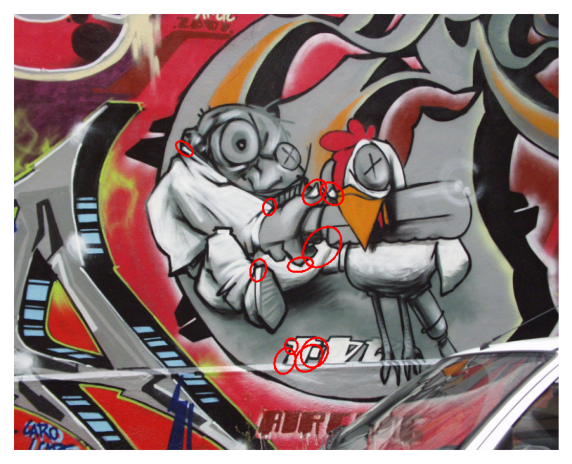

In [18]:
image_path = "imgs/01.png"
img = cv2.imread(image_path)
img_with_ellipses = draw_ellipses(img, array_data, scale_factor=1)
# show
plt.figure(figsize=(10, 10))    
plt.axis('off')
plt.imshow(cv2.cvtColor(img_with_ellipses, cv2.COLOR_BGR2RGB))



In [19]:
file_name = "imgs/02.png.hesaff.sift"
array_data = load_keypoint_data_from_file(file_name)

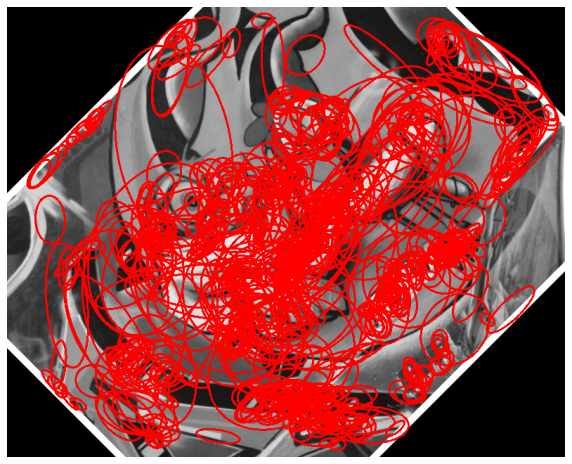

In [20]:
image_path = "imgs/02.png"
img = cv2.imread(image_path)
img_with_ellipses = draw_ellipses(img, array_data, scale_factor=1)
# show
plt.figure(figsize=(10, 10))    
plt.axis('off')
plt.imshow(cv2.cvtColor(img_with_ellipses, cv2.COLOR_BGR2RGB))
